In [20]:
#from jupyterthemes import get_themes
#import jupyterthemes as jt
#from jupyterthemes.stylefx import set_nb_theme
# uncomment and execute line to try a new theme
#set_nb_theme('solarizedl')

## Reading data from the files

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from numpy.linalg import inv
cov = (np.genfromtxt('DS1_Cov.txt', delimiter=',',dtype=float))[:,:-1]
m0  = (np.genfromtxt('DS1_m_0.txt', delimiter=',',dtype=float))[:-1]
m1  = (np.genfromtxt('DS1_m_1.txt', delimiter=',', dtype=float))[:-1]
m0  =  np.array(m0).reshape(m0.shape[0],1)
m1  =  np.array(m1).reshape(m1.shape[0],1)
print cov.shape


(20, 20)


In [22]:
## generating data
x0 = np.random.multivariate_normal(m0.reshape(20), cov, 2000)
x1 = np.random.multivariate_normal(m1.reshape(20), cov, 2000)
threshold = int(x0.shape[0]*0.3)
print threshold
print x1.shape

600
(2000, 20)


In [23]:
## making training set and test with 2 classes, 1400 for each of classes in training set
## and 600 for each class in the test-set
index0= np.random.permutation(x0.shape[0])
index1= np.random.permutation(x1.shape[0])

train  = np.concatenate([x0[index0[threshold:]],x1[index1[threshold:]]]);
test   = np.concatenate([x0[index0[:threshold]],x1[index1[:threshold]]]);


print test.shape
print train.shape
print threshold


(1200, 20)
(2800, 20)
600


## LDA

In [24]:
sigma = 0.5;
N1 = index0[threshold:].shape[0]
N2 = x1[index1[threshold:]].shape[0]
N  = N1+N2
u1 =    np.sum(x0[index0[threshold:]], axis=0)/N1
u2 =    np.sum(x1[index0[threshold:]], axis=0)/N2

temp = x0[index0[threshold:]];
S1   = np.dot((temp-u1).T,(temp-u1))/N1
temp = x1[index1[threshold:]];
S2   = np.dot((temp-u2).T,(temp-u2))/N2
Sigma= (float(N1)/N)*S1 + (float(N2)/N)*S2

#print np.dot((temp[0:10,:]-u1).reshape(20,1),(temp[0:10,:]-u1).reshape(20,1).T)
#print np.dot((temp[:20,:]-u1).T,(temp[:20,:]-u1))

myX0 = np.random.multivariate_normal(u1.reshape(20), Sigma, 2000)
myX1 = np.random.multivariate_normal(u2.reshape(20), Sigma, 2000)


trainY = np.array(np.ones(N1+N2))
trainY[N1:] = -1;
testY = np.array(np.ones(threshold*2))
testY[threshold:] = -1;

print "Sigma is :\n", Sigma
print "u1 is: \n",u1
print "u2 is:\n",u2

Sigma is :
[[ 8.15083295  5.65890686  6.32261848  5.35483746  6.16473836  6.27235078
   4.87208109  5.53917397  5.14405381  5.38555578  4.14965197  5.44314411
   7.33833368  6.21901957  6.26900932  6.16964337  6.00957471  5.87191063
   5.79183442  6.18260699]
 [ 5.65890686  6.91202138  5.48757058  4.45775075  5.64737392  5.65707459
   4.44657216  4.01432659  4.28191842  5.110431    3.52809644  4.72059647
   6.07853688  5.24169078  5.56934146  5.42182757  5.7561272   5.21116155
   5.4584279   5.55135937]
 [ 6.32261848  5.48757058  7.43563527  4.9969448   6.0099351   6.70354446
   4.69519591  4.88333988  4.9745947   5.18845865  3.41324246  4.7634229
   6.53440141  5.33148811  6.18968723  6.12692966  6.37023234  5.14242651
   4.82813409  5.29457613]
 [ 5.35483746  4.45775075  4.9969448   6.00372781  5.590884    4.58035744
   3.8898969   4.50353494  3.52780028  4.3703463   2.96075365  4.35889696
   6.08798552  5.0018949   4.93738554  5.28728317  4.87012722  4.75501996
   4.09412383  5.9994

### Computing error of training set

In [25]:
from numpy.linalg import inv

w   =     np.dot(inv(Sigma),(u1-u2))
w0 = -0.5*np.dot(np.dot(u1,inv(Sigma)),u1) + 0.5*np.dot(np.dot(u2,inv(Sigma)),u2)

a       = np.dot(train,w) +w0
softmax = 1./ (1.+np.exp(-a))

result = softmax >0.5
result = (result-0.5)*2
compare = trainY == result


### Cmomputing accuracies

In [26]:
TP = np.count_nonzero((result==1) & (trainY==1))
TN = np.count_nonzero((result==-1) & (trainY==-1))
FP = np.count_nonzero((result==1) & (trainY==-1))
FN = np.count_nonzero((result==-1) & (trainY==1))

confusionMatrix = np.array([[TP,FP],[FN,TN]])
print "Confusion Matrix is: \n" , confusionMatrix ,'\n'

Accuracy  = float((TP+TN))/(TP+TN + FP+FN)
Percision = float(TP) / (TP+FP) 
Recall    = float(TP) / (TP+FN) 
F1        = Percision*Recall / (Percision +Recall)
print "Accuracy is:\n", Accuracy ,'\n'
print "Percision is:\n", Percision ,'\n'
print "Recall is:\n", Recall ,'\n'
print "F1 is:\n", F1 ,'\n'

Confusion Matrix is: 
[[1342   63]
 [  58 1337]] 

Accuracy is:
0.956785714286 

Percision is:
0.955160142349 

Recall is:
0.958571428571 

F1 is:
0.478431372549 



## Writing DS1.csv

In [27]:
print test.shape
print testY.reshape(testY.shape[0],1).shape

DS1 = np.concatenate((test, testY.reshape(testY.shape[0],1)), axis=1)
np.savetxt('DS1.csv', DS1, delimiter=',')

(1200, 20)
(1200, 1)


## W and W0

In [28]:
print "w0 is: \n", w0
print
print "w is \n", w

w0 is: 
27.1192869684

w is 
[ 14.40067028  -8.64828269  -5.2847195   -2.80716295  -9.50482265
  -4.36677786  16.25109829 -24.30298783 -28.8219005    9.35841128
 -13.20755698 -11.96483205  15.24318808  12.63667068  -5.70866908
  13.08327162  28.90864996  -6.77854699   0.17432775  -5.14987573]


## Evaluating on testset

In [35]:
a       = np.dot(test,w) +w0
softmax = 1./ (1.+np.exp(-a))

result = softmax >0.5
result = (result-0.5)*2
compare = testY == result



TP = np.count_nonzero((result==1) & (testY==1))
TN = np.count_nonzero((result==-1) & (testY==-1))
FP = np.count_nonzero((result==1) & (testY==-1))
FN = np.count_nonzero((result==-1) & (testY==1))

confusionMatrix = np.array([[TP,FP],[FN,TN]])

Accuracy  = float((TP+TN))/(TP+TN + FP+FN)
Percision = float(TP) / (TP+FP) 
Recall    = float(TP) / (TP+FN) 
F1        = Percision*Recall / (Percision +Recall)
print "Confusion Matrix is: \n" , confusionMatrix ,'\n'
print "Accuracy is:\n", Accuracy ,'\n'
print "Percision is:\n", Percision ,'\n'
print "Recall is:\n", Recall ,'\n'
print "F1 is:\n", F1 ,'\n'

Confusion Matrix is: 
[[580  33]
 [ 20 567]] 

Accuracy is:
0.955833333333 

Percision is:
0.94616639478 

Recall is:
0.966666666667 

F1 is:
0.478153338829 



## KNN

In [29]:
def myKNN(K):
    dist     = np.zeros([test.shape[0],K],dtype=float)
    indexArr = np.zeros([test.shape[0],K],dtype=int)
    resultKNN   = np.zeros([test.shape[0],1],dtype=int)
    targets = [1,-1]
    for i in range(test.shape[0]):
        eucludian   = np.sqrt(np.sum((test[i]-train)**2,axis=1))
        indexArr[i] = eucludian.argsort(axis=0)[:K];
        dist[i]     = eucludian[indexArr[i]]
        majority    = np.count_nonzero(trainY[indexArr[i]]==1)
        resultKNN[i]   = targets[(2*majority -K )>0]
    return resultKNN

In [30]:
def computeAccuracy(resultKNN,testY,showResults):
    testY = testY.reshape(testY.shape[0],1);
    TP = np.count_nonzero((resultKNN==1)  & (testY== 1))
    TN = np.count_nonzero((resultKNN==-1) & (testY==-1))
    FP = np.count_nonzero((resultKNN==1)  & (testY==-1))
    FN = np.count_nonzero((resultKNN==-1) & (testY== 1))

    confusionMatrix = np.array([[TP,FP],[FN,TN]])
    

    Accuracy  = float((TP+TN))/(TP+TN + FP+FN)*100
    Percision = float(TP) / (TP+FP) *100
    Recall    = float(TP) / (TP+FN) *100
    F1        = Percision*Recall / (Percision +Recall)
    if showResults:
        print "Confusion Matrix is: \n" , confusionMatrix 
        print "Accuracy is:\t", Accuracy 
        print "Percision is:\t", Percision 
        print "Recall is:\t", Recall 
        print "F1 score is:\t", F1
    return [confusionMatrix,Accuracy,Percision,Recall,F1]

In [31]:
Ks = 300
scale = 2
Accuracy        = np.zeros(Ks,dtype=float)
Percision       = np.zeros(Ks,dtype=float)
Recall          = np.zeros(Ks,dtype=float)
F1              = np.zeros(Ks,dtype=float)
confusionMatrix = np.zeros((Ks,2,2),dtype=float)

for i in range(Ks):
    print "...............  K=%d  ..............."%(i*scale+1)
    resultKNN = myKNN(i*scale+1)
    confusionMatrix[i],Accuracy[i],Percision[i],Recall[i],F1[i]= computeAccuracy(resultKNN,testY,True)
maxIndx = np.argmax(Accuracy)

...............  K=1  ...............
Confusion Matrix is: 
[[292 329]
 [308 271]]
Accuracy is:	46.9166666667
Percision is:	47.0209339775
Recall is:	48.6666666667
F1 score is:	23.9148239148
...............  K=3  ...............
Confusion Matrix is: 
[[302 330]
 [298 270]]
Accuracy is:	47.6666666667
Percision is:	47.7848101266
Recall is:	50.3333333333
F1 score is:	24.512987013
...............  K=5  ...............
Confusion Matrix is: 
[[299 338]
 [301 262]]
Accuracy is:	46.75
Percision is:	46.9387755102
Recall is:	49.8333333333
F1 score is:	24.1713823767
...............  K=7  ...............
Confusion Matrix is: 
[[291 325]
 [309 275]]
Accuracy is:	47.1666666667
Percision is:	47.2402597403
Recall is:	48.5
F1 score is:	23.9309210526
...............  K=9  ...............
Confusion Matrix is: 
[[287 326]
 [313 274]]
Accuracy is:	46.75
Percision is:	46.8189233279
Recall is:	47.8333333333
F1 score is:	23.660346249
...............  K=11  ...............
Confusion Matrix is: 
[[283 344]
 [317

In [34]:
maxIndx = np.argmax(Accuracy);
print "best performence among the tested Ks is fo %d"% (maxIndx+scale)
print "Confusion Matrix is: \n" , confusionMatrix[maxIndx] 
print "Accuracy is:\t", Accuracy[maxIndx] 
print "Percision is:\t", Percision[maxIndx] 
print "Recall is:\t", Recall[maxIndx] 
print "F1 score is:\t", F1[maxIndx]

best performence among the tested Ks is fo 3
Confusion Matrix is: 
[[ 302.  330.]
 [ 298.  270.]]
Accuracy is:	47.6666666667
Percision is:	47.7848101266
Recall is:	50.3333333333
F1 score is:	24.512987013


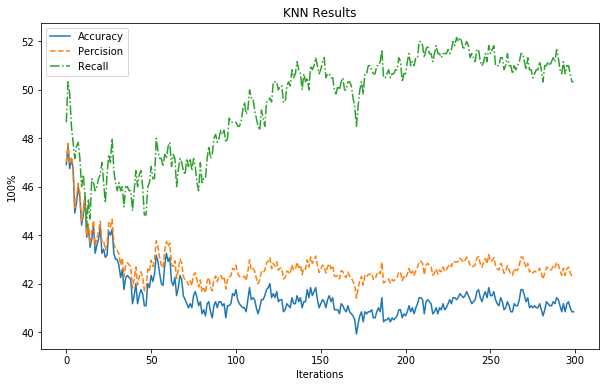

In [33]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_title('KNN Results')
plt.plot(range(Ks),Accuracy,  label="Accuracy")
plt.plot(range(Ks),Percision,'--', label="Percision")
plt.plot(range(Ks),Recall,'-.',    label="Recall")
#plt.plot(range(Ks*scale),F1, label="F1 Score")
ax.set_xlabel('Iterations')
ax.set_ylabel('100%')
ax.legend(loc='best')
plt.show()

In [20]:
print range(5)[:0]

[]
